## Problem Statement

**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

The steps are broadly:
1. Read and understand the data, performed the EDA in the form of Univariate and Bivariate Analysis
2. Clean the data and Outlier Analysis
3. Prepare the data for modelling
4. Modelling using both K-Means and Hierarchical Clustering (both single and complete linkage)
5. Analyse the clusters by comparing three variables - gdpp, child_mort and income for different countriesi.e. Visualizations on    the clusters formed, final analysis in the form of charts and graphs.
6. Final suggestion of five countries 5 countries which are in direst need of aid. 

# Step 1: Read and understand the data, perform the EDA in the form of Univariate and Bivariate Analysis

## Import modules

In [1]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#modules for predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_samples, silhouette_score

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv(r'\\192.168.54.72\banking\Projects\321119373045_RBI\Working\1.Team\Sonu\MSc\New folder\Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df1=df.drop('country',axis=1)
df1['exports'] = df1['exports']*df1['gdpp']/100
df1['imports'] = df1['imports']*df1['gdpp']/100
df1['health'] = df1['health']*df1['gdpp']/100
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Visualization of Dataset

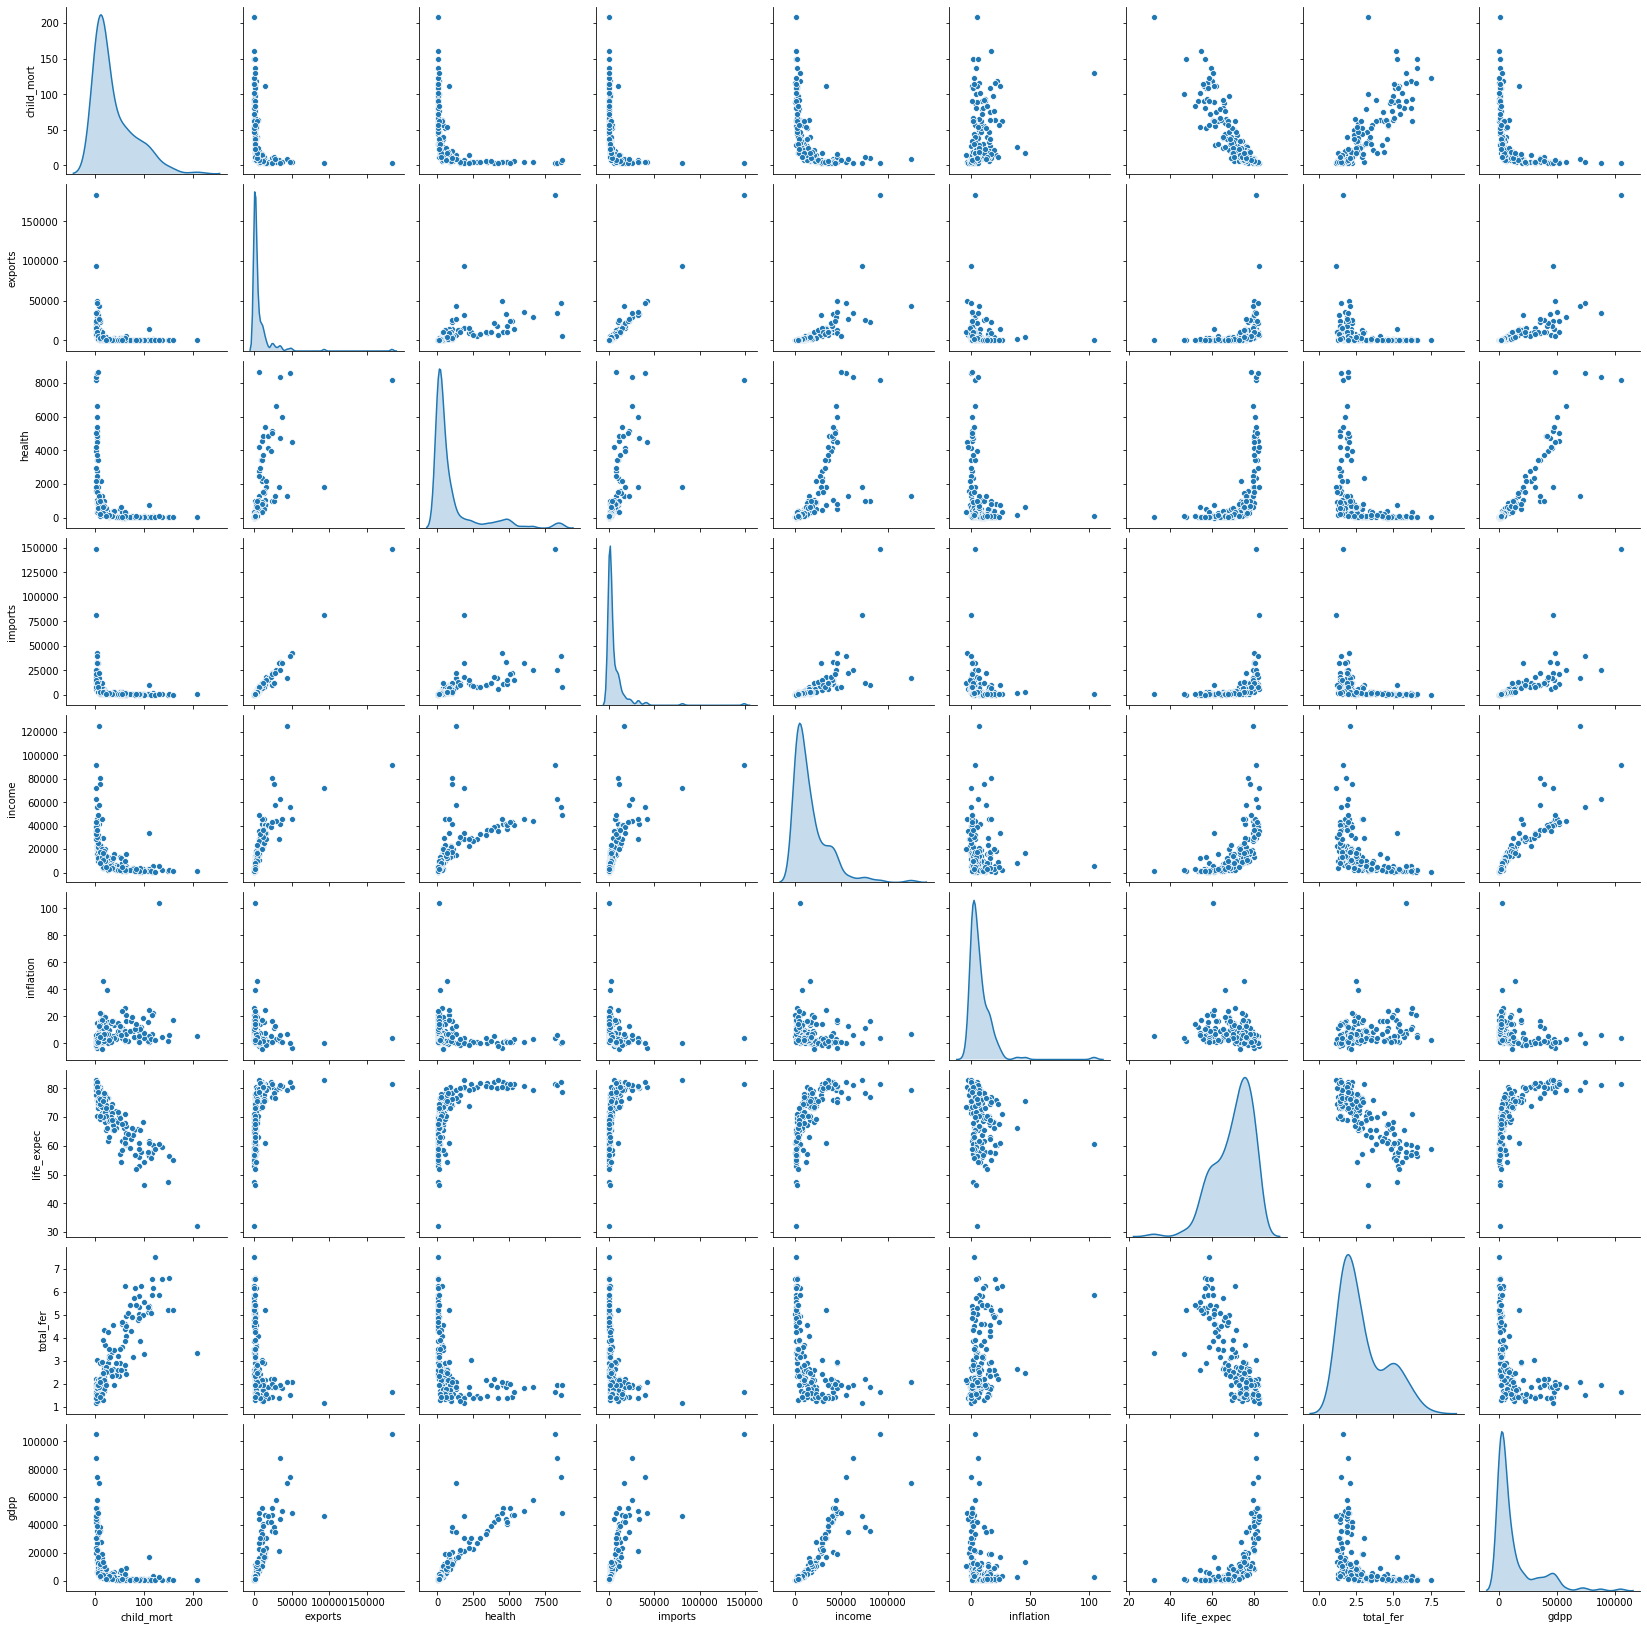

In [7]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

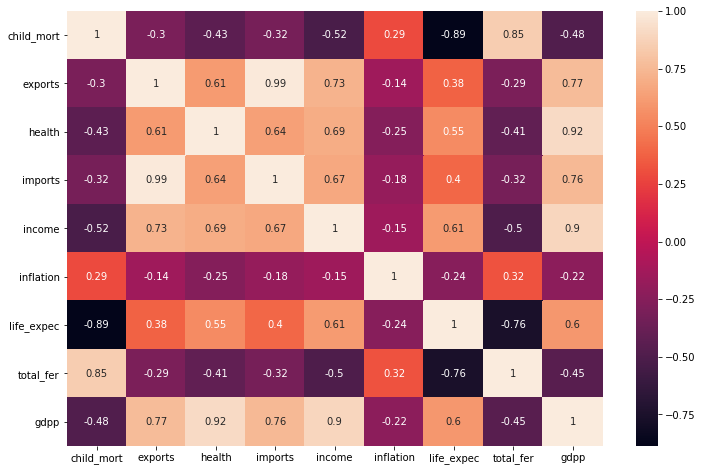

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

From the above heatmap it can be seen exports and imports are having high correlation with each other

## Step 2: Clean the data and Outlier Analysis

In [9]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


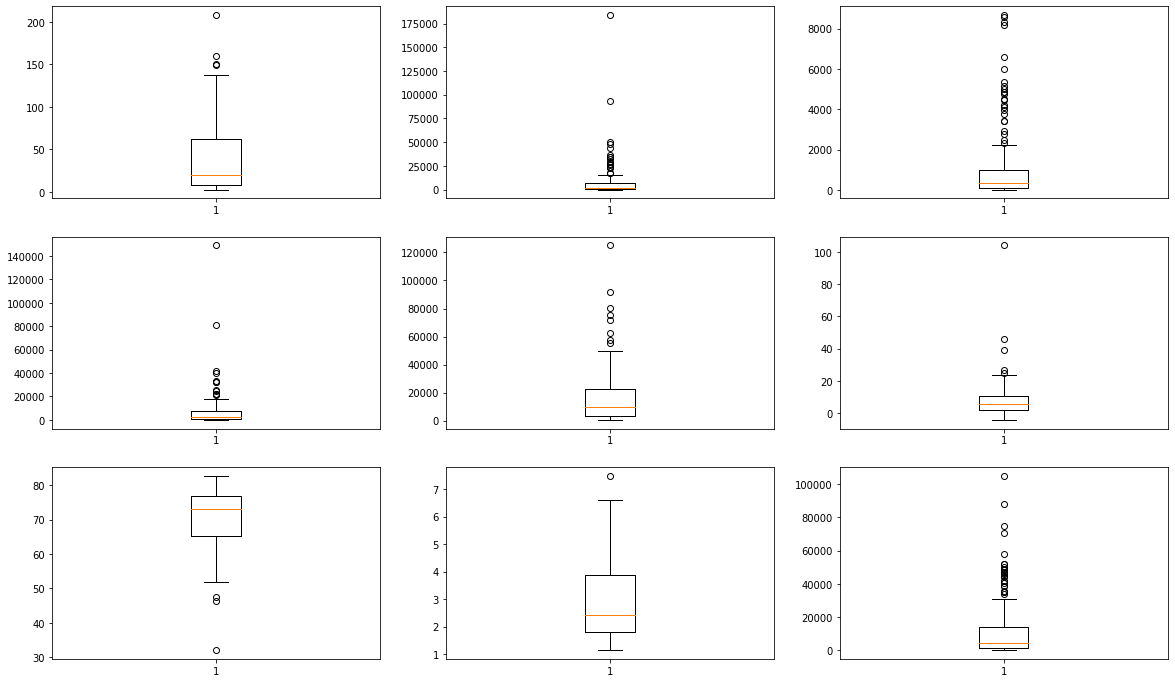

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.boxplot(df1['child_mort'])
plt.subplot(3,3,2)
plt.boxplot(df1['exports'])
plt.subplot(3,3,3)
plt.boxplot(df1['health'])
plt.subplot(3,3,4)
plt.boxplot(df1['imports'])
plt.subplot(3,3,5)
plt.boxplot(df1['income'])
plt.subplot(3,3,6)
plt.boxplot(df1['inflation'])
plt.subplot(3,3,7)
plt.boxplot(df1['life_expec'])
plt.subplot(3,3,8)
plt.boxplot(df1['total_fer'])
plt.subplot(3,3,9)
plt.boxplot(df1['gdpp'])

plt.show()

## Step 3: Prepare the data for modelling

In [11]:
# Since the distribution is not normal, converting the dataset to normal distribution to better fit the model
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df1_transformed=pd.DataFrame(pt.fit_transform(df1))
df1_transformed.columns=df1.columns
df1_transformed.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228


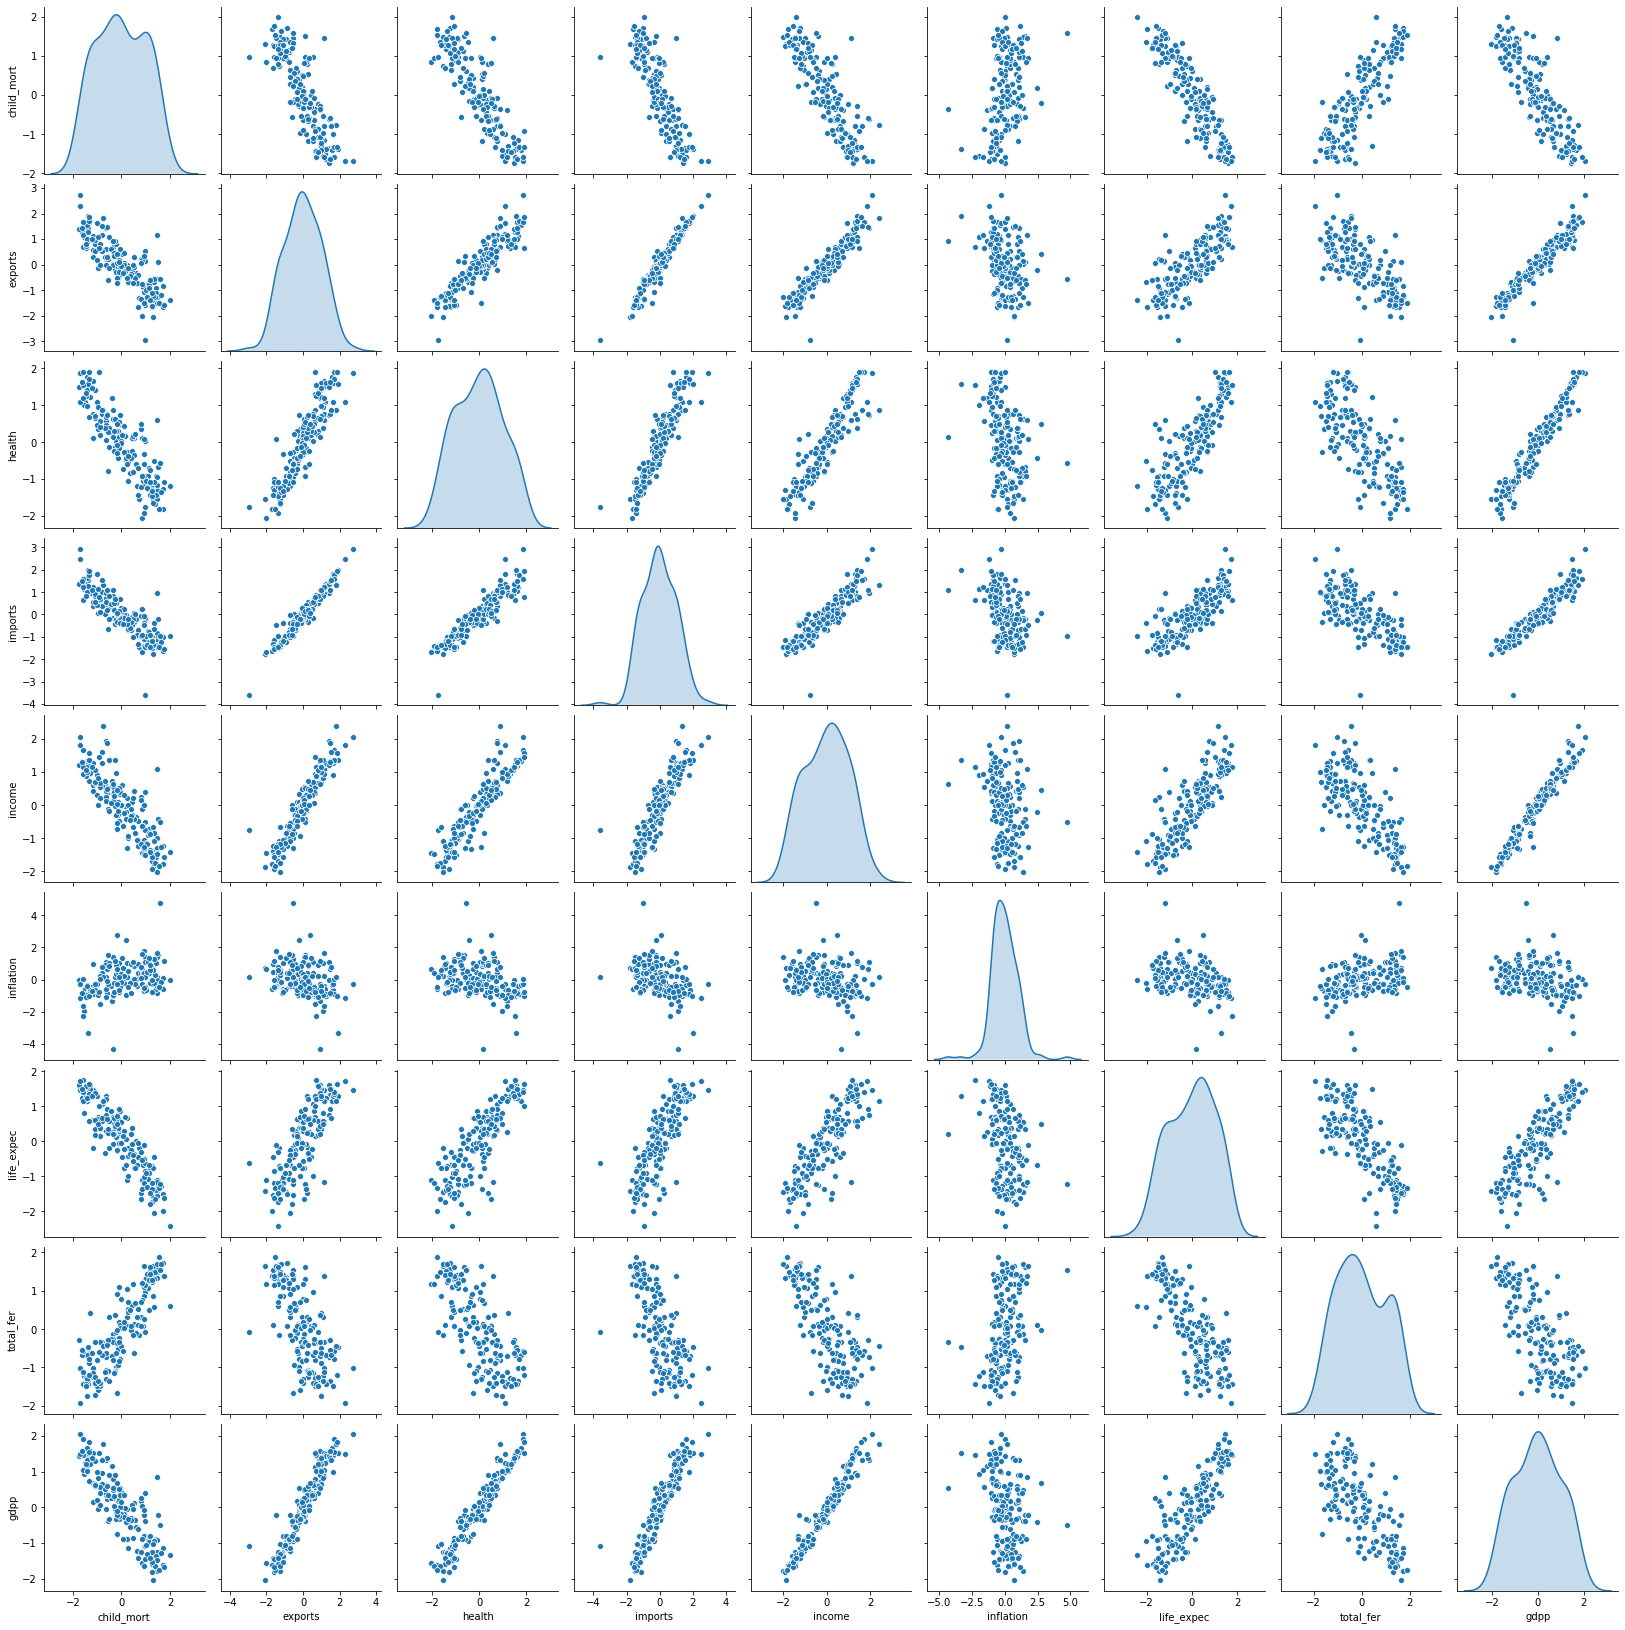

In [12]:
#Verifying the dataset after performing powertransformation
sns.pairplot(df1_transformed,diag_kind='kde')
plt.show()

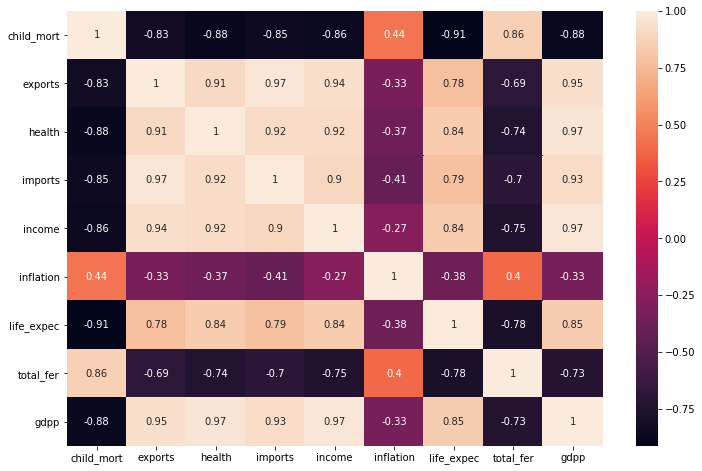

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df1_transformed.corr(),annot=True)
plt.show()

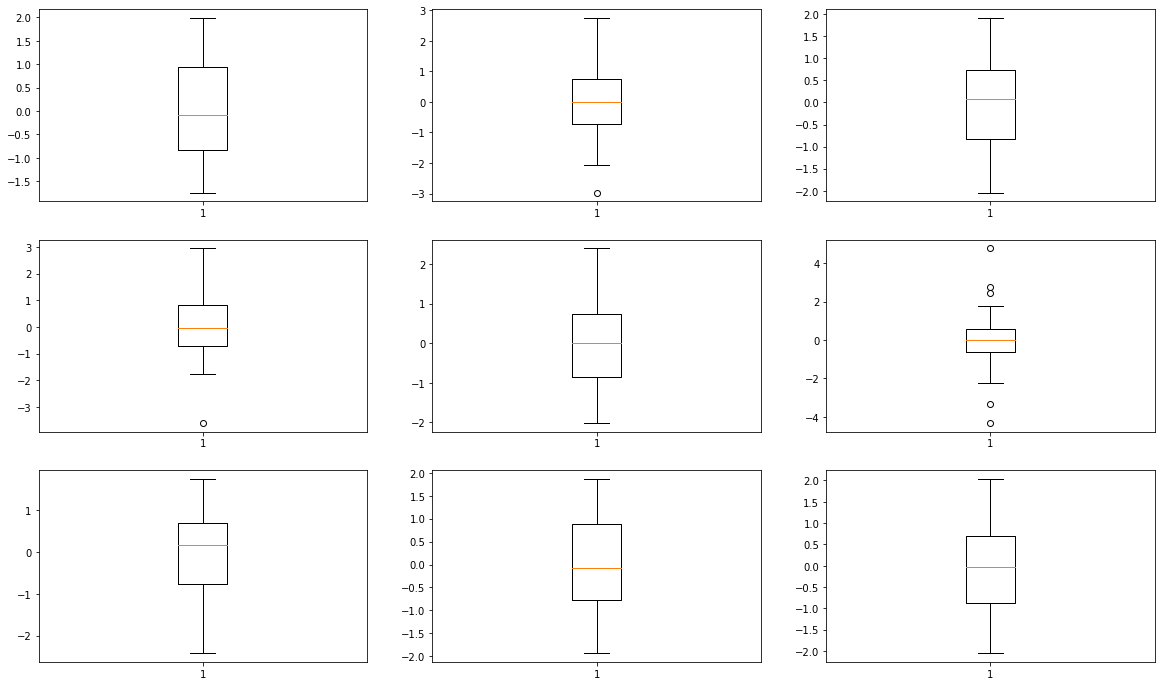

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.boxplot(df1_transformed['child_mort'])
plt.subplot(3,3,2)
plt.boxplot(df1_transformed['exports'])
plt.subplot(3,3,3)
plt.boxplot(df1_transformed['health'])
plt.subplot(3,3,4)
plt.boxplot(df1_transformed['imports'])
plt.subplot(3,3,5)
plt.boxplot(df1_transformed['income'])
plt.subplot(3,3,6)
plt.boxplot(df1_transformed['inflation'])
plt.subplot(3,3,7)
plt.boxplot(df1_transformed['life_expec'])
plt.subplot(3,3,8)
plt.boxplot(df1_transformed['total_fer'])
plt.subplot(3,3,9)
plt.boxplot(df1_transformed['gdpp'])

plt.show()

From the above Boxplot it can be seen there are very few data points which are outliers and these points can be accomodated 
for further analysis

## Step 4: Modelling using both K-Means and Hierachical Clustering (both single and complete linkage)

For k-means we must tell it how many clusters are expected. Figuring out how many clusters we need is not obvious from data, thus we will try different cluster numbers and check their silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The elbow method can be used to determine the number of clusters as well.

Note: K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called k-means++

## Modelling with KMeans Clustering

In [15]:
X=df1_transformed.copy()

In [16]:
# Applying KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)
kmeans.labels_

array([2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2])

In [17]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.44420866548727334
For n_clusters=3, the silhouette score is 0.3970904804043125
For n_clusters=4, the silhouette score is 0.3113759554640961
For n_clusters=5, the silhouette score is 0.26576081496982223
For n_clusters=6, the silhouette score is 0.2856149917212856
For n_clusters=7, the silhouette score is 0.2708017501423723
For n_clusters=8, the silhouette score is 0.2566259576896509


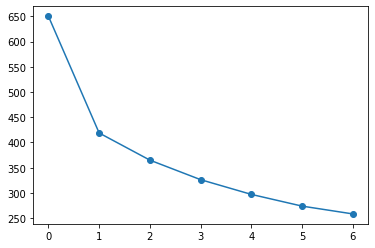

In [18]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd, marker = "o")
plt.show()

In [19]:
# Final Model
kmeans = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.17330507 -1.14975736 -1.17619414 -1.13618535 -1.20962975  0.43422925
  -1.12302598  1.13631868 -1.19390869]
 [-0.04128765  0.03358007  0.03112836 -0.00248561  0.09416955  0.23550992
   0.07353174 -0.18750883  0.03708553]
 [-1.18670464  1.17313325  1.20490898  1.21240979  1.14658763 -0.81270547
   1.08519313 -0.92958118  1.21488186]]


In [20]:
prediction= kmeans.predict(X)
X_df = pd.DataFrame(X, columns= df1_transformed.columns)
X_df["group"] = prediction

In [21]:
X_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273,0
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133,1
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195,1
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228,2


## Modelling with Hierarchical Clustering

In [22]:
X=df1_transformed.copy()

In [23]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

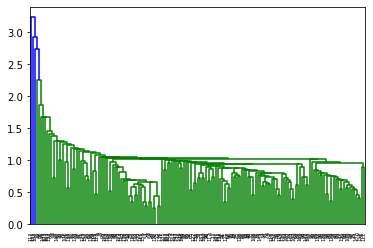

In [24]:
# single linkage
mergings = linkage(X, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

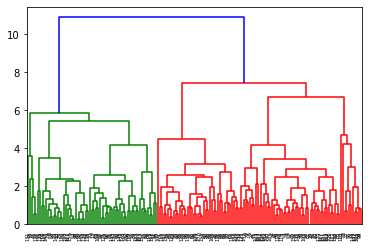

In [25]:
# complete linkage
mergings = linkage(X, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [26]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [27]:
# assign cluster labels
X['cluster_labels'] = cluster_labels
X_df1=X.copy()
X_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273,0
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133,1
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195,1
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,1
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228,2


## Step 5: Analyse the clusters by comparing three variables - gdpp, child_mort and income for different countries i.e. Visualizations on the clusters formed, final analysis in the form of charts and graphs.

## Visualization for KMeans Clustering

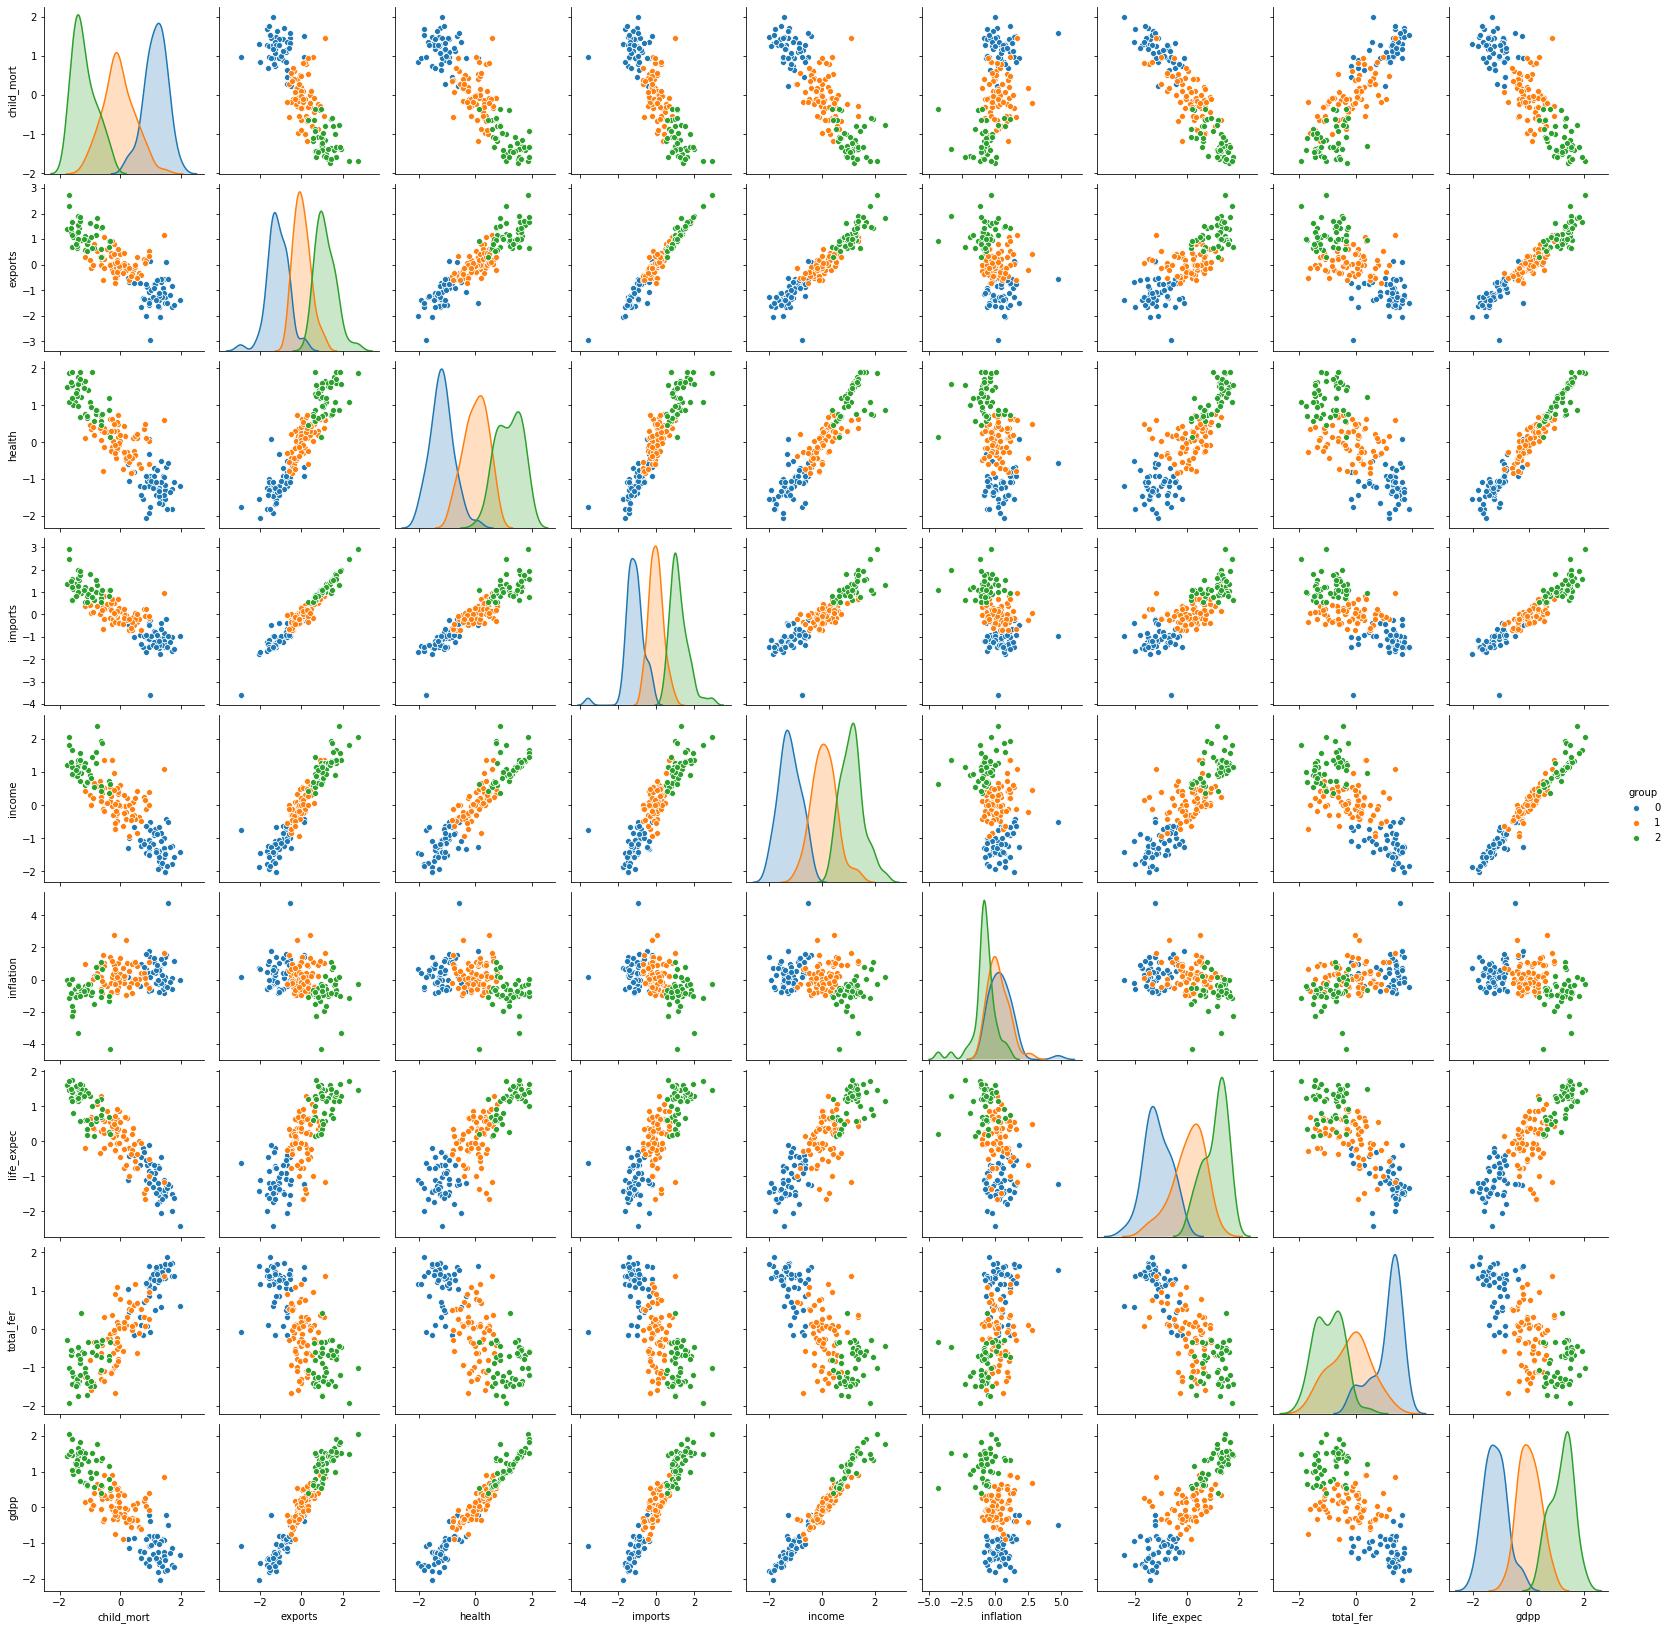

In [28]:
sns.pairplot(X_df,diag_kind='kde',hue='group')
plt.show()

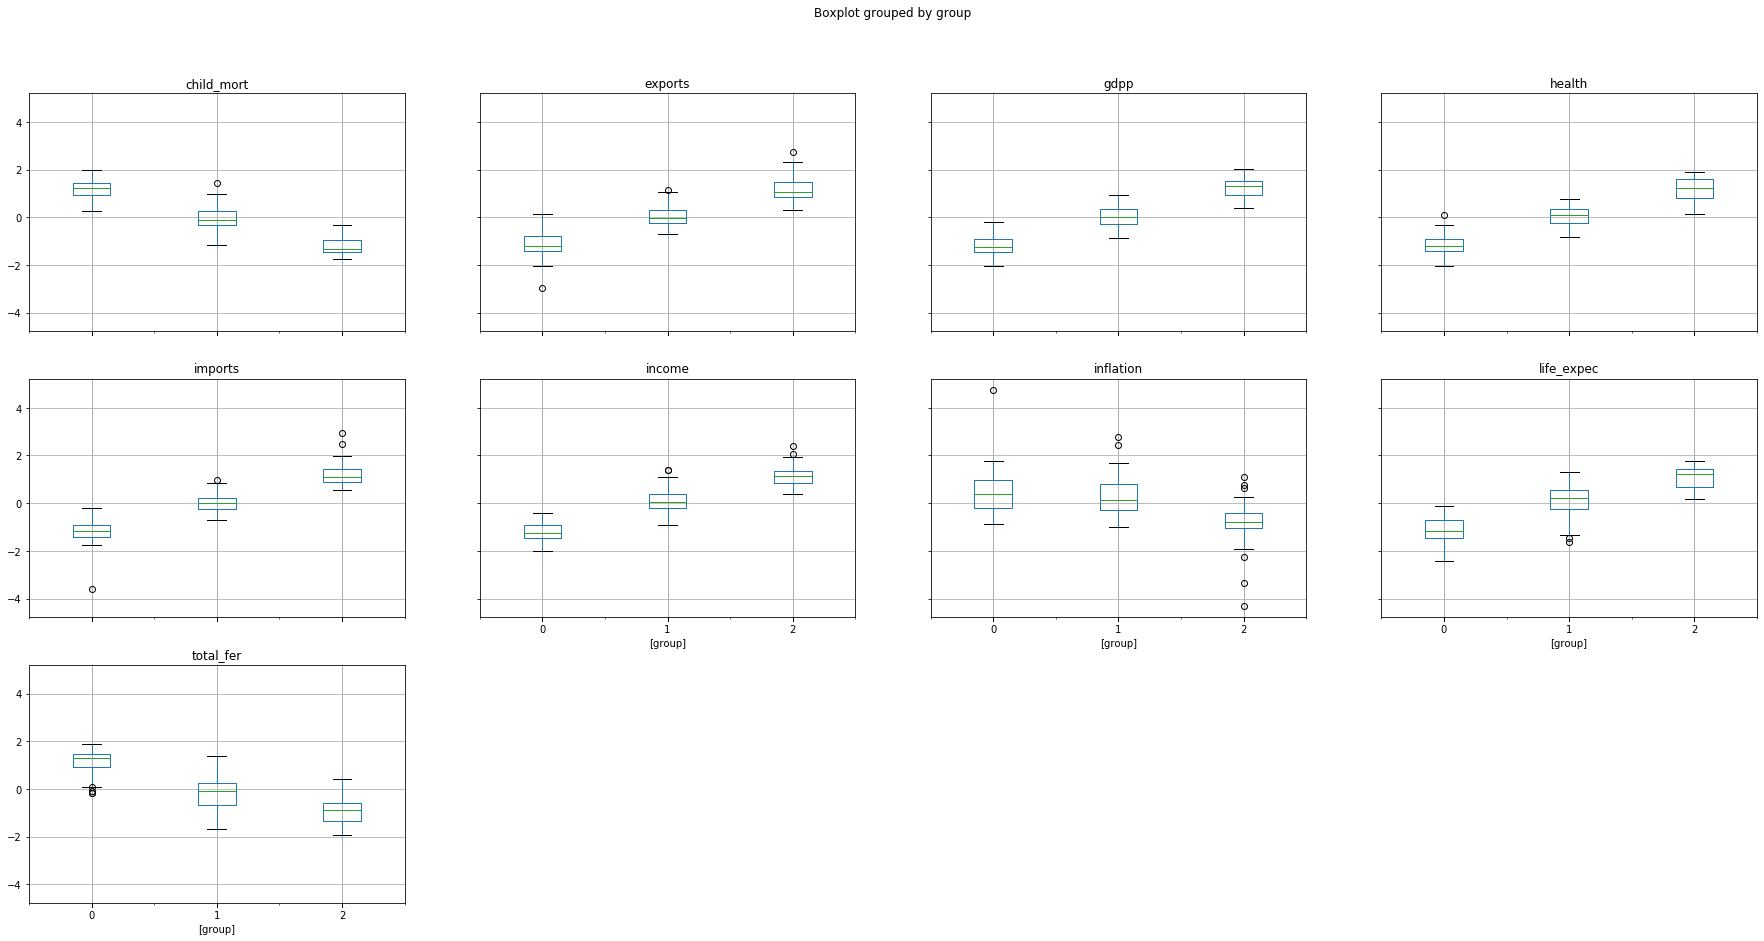

In [29]:
X_df.boxplot(by = 'group', layout=(3,4), figsize=(30, 15))
plt.show()

## Visualization for Hierarchical Clustering

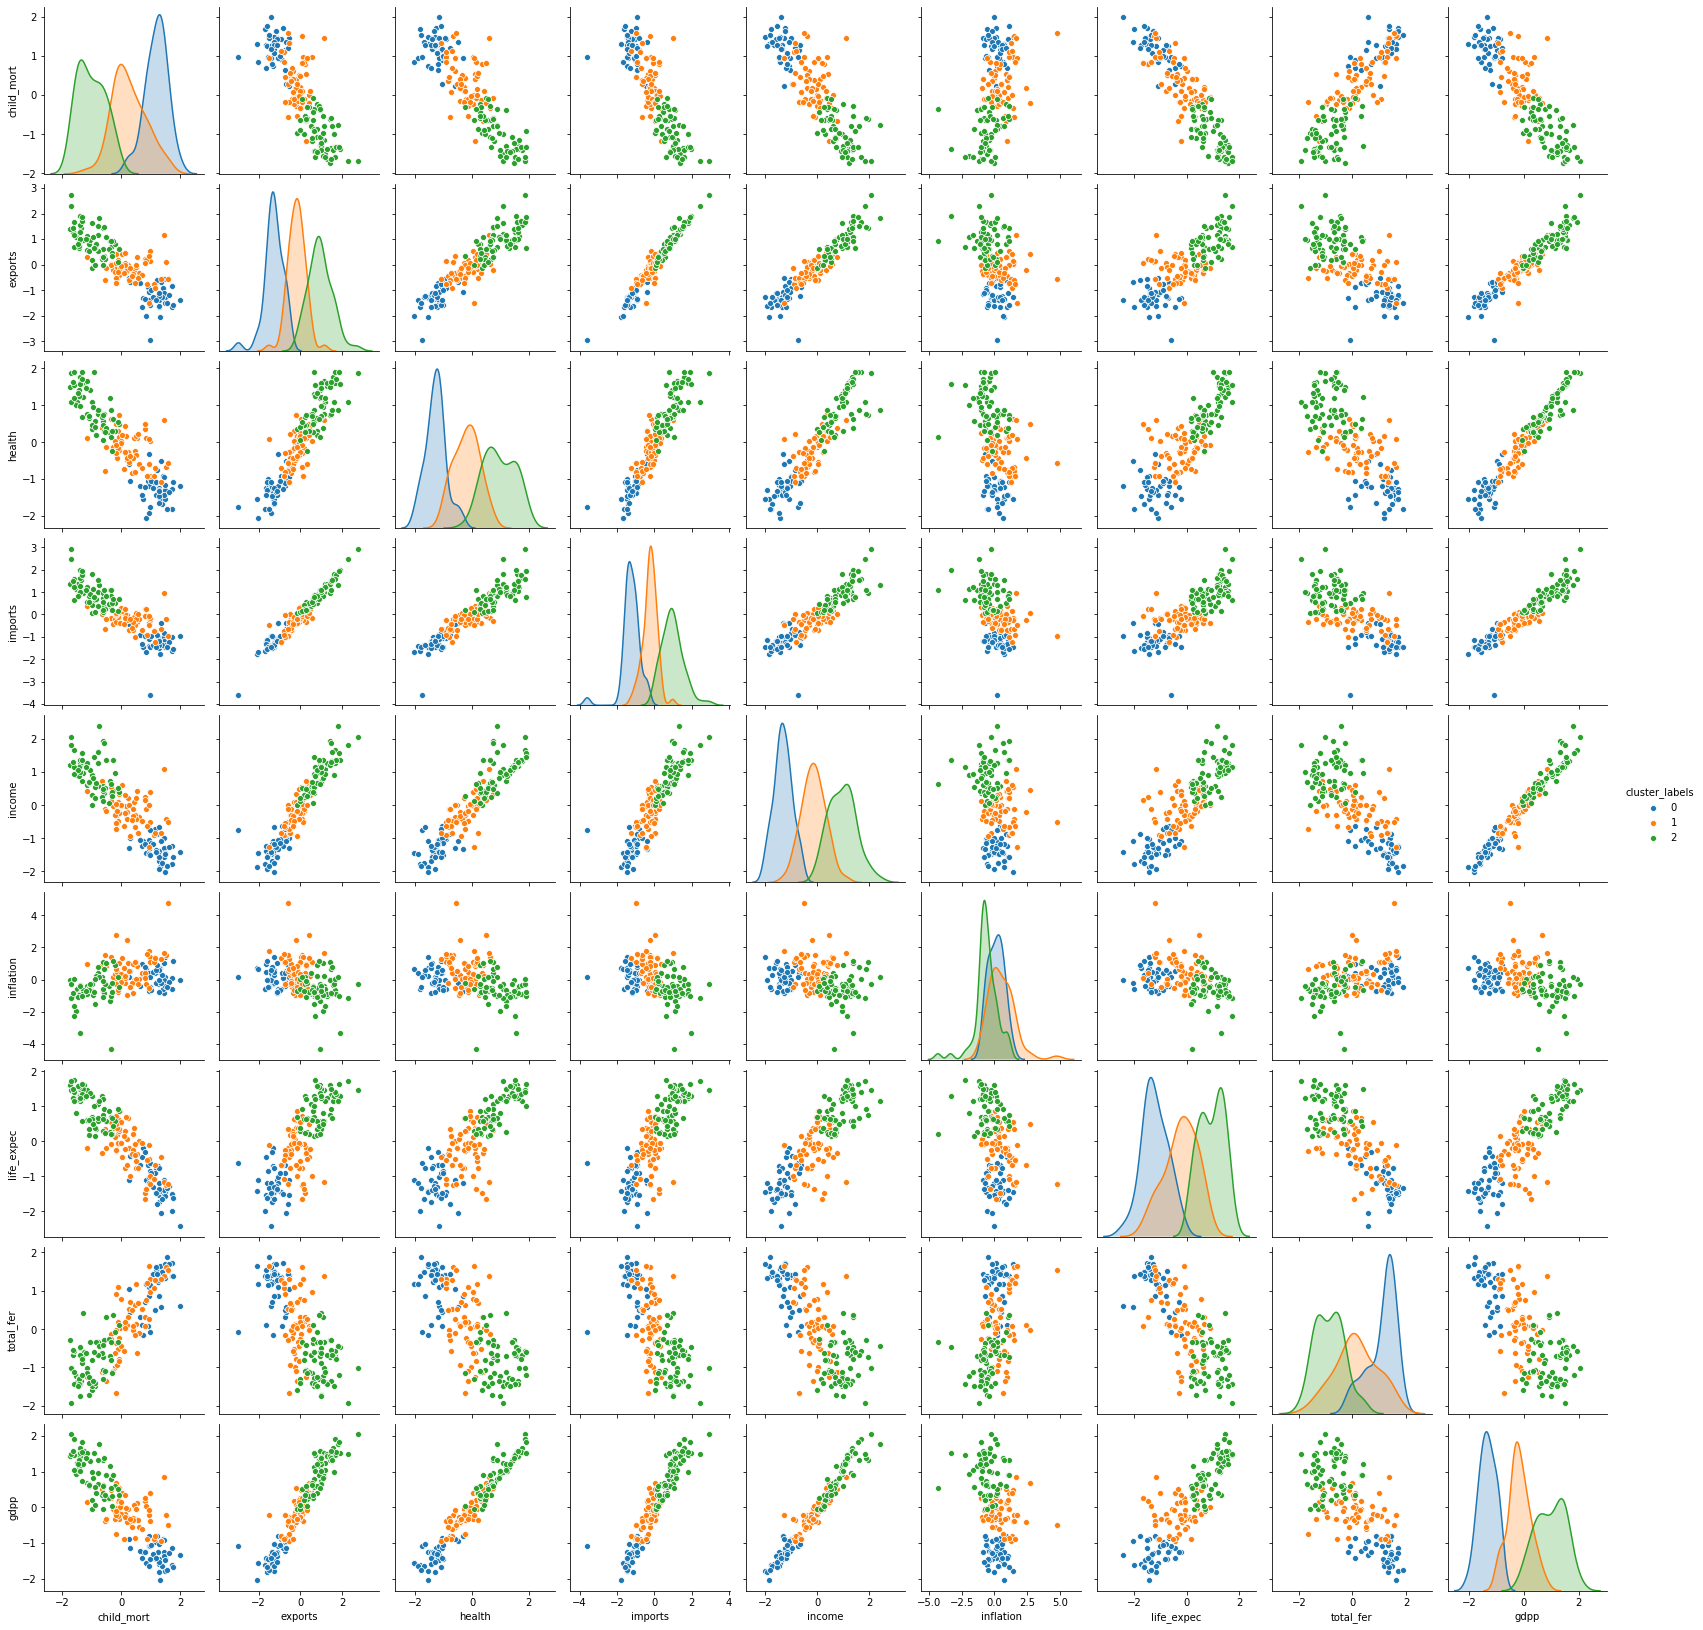

In [30]:
sns.pairplot(X_df1,diag_kind='kde',hue='cluster_labels')
plt.show()

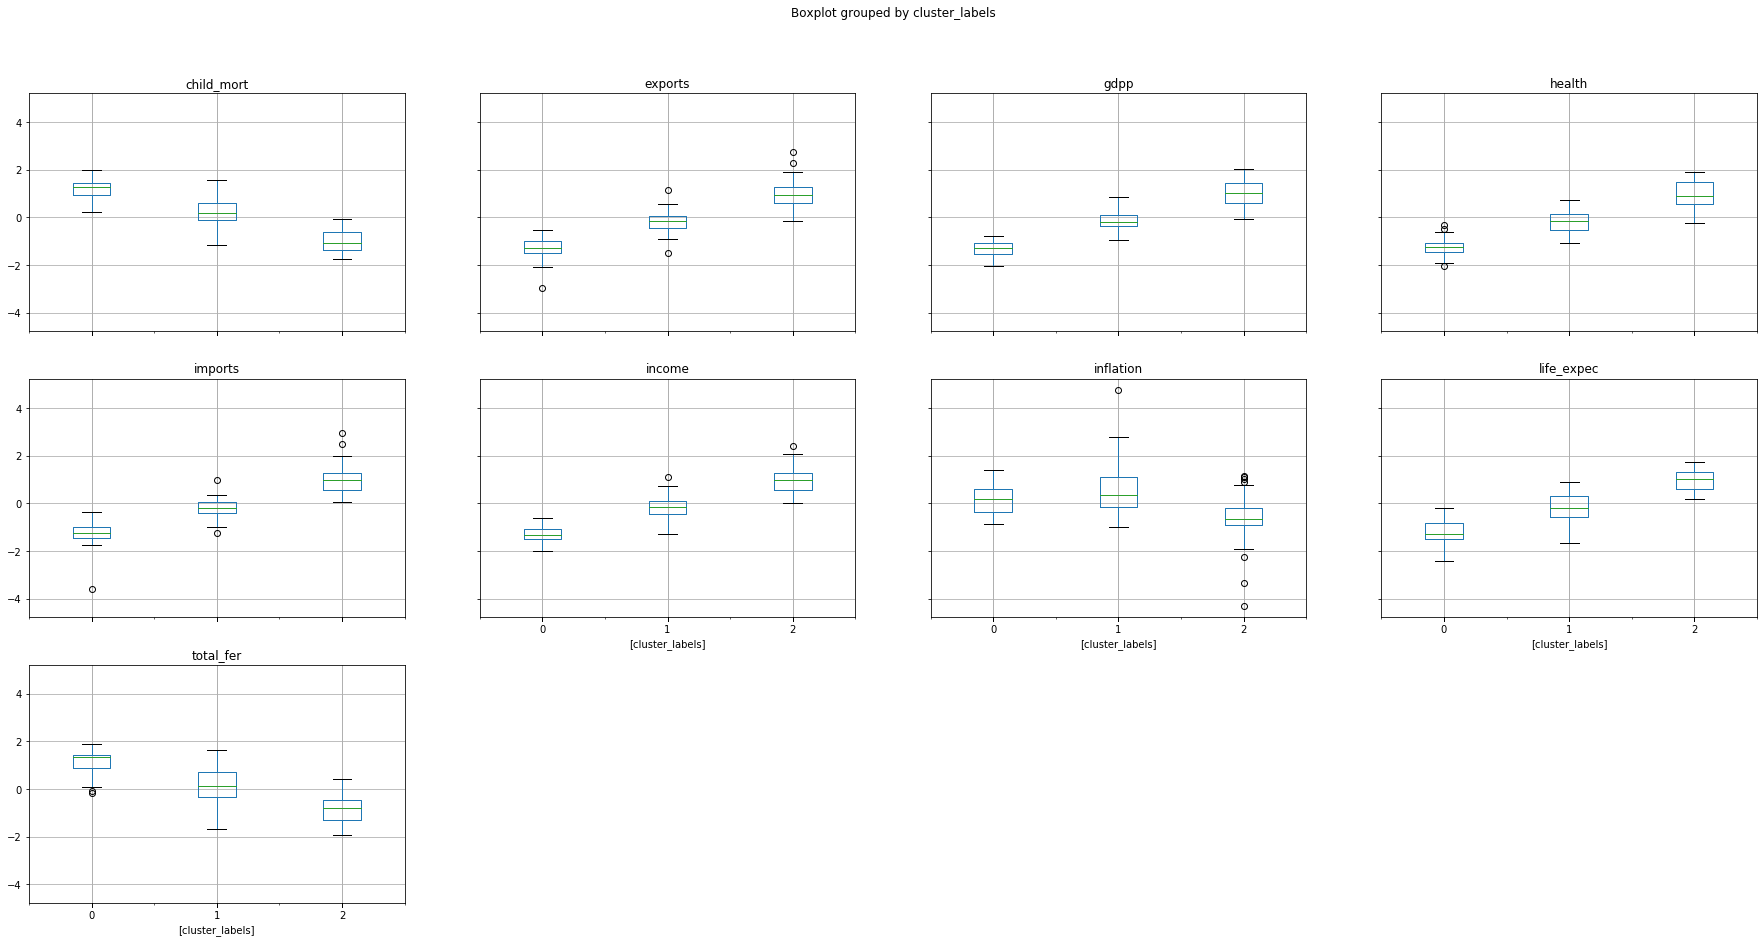

In [31]:
X_df1.boxplot(by = 'cluster_labels', layout=(3,4), figsize=(30, 15))
plt.show()

## Step 6: Final suggestion of five countries  which are in direst need of aid.

In [32]:
final_data=pd.concat([X_df,df['country']],axis=1)
final_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,country
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273,0,Afghanistan
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133,1,Albania
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195,1,Algeria
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0,Angola
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228,2,Antigua and Barbuda
5,-0.339697,0.036270,0.636466,-0.168627,0.553895,1.412022,0.545301,-0.120706,0.496207,1,Argentina
6,-0.144877,-0.508145,-0.442152,-0.241864,-0.307448,0.275860,0.183248,-0.932506,-0.281188,1,Armenia
7,-1.277117,0.950906,1.572599,1.032075,1.282892,-0.793127,1.594457,-0.604207,1.574088,2,Australia
8,-1.364807,1.451427,1.640826,1.531545,1.323552,-0.870154,1.319778,-1.341021,1.506685,2,Austria
9,0.537221,0.296020,0.109133,-0.353539,0.417398,0.870730,-0.353603,-0.616839,0.117089,1,Azerbaijan


In [33]:
final_data.sort_values(['child_mort','income','gdpp'],ascending=[False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,country
66,1.983013,-1.395375,-1.180833,-0.948278,-1.417846,-0.016170,-2.416375,0.600969,-1.341541,0,Haiti
132,1.759989,-1.576152,-1.091915,-1.556923,-1.558710,1.145065,-1.604688,1.378219,-1.681334,0,Sierra Leone
32,1.704850,-0.851828,-1.260167,-0.999897,-1.242078,0.108413,-1.506174,1.713262,-1.137715,0,Chad
31,1.699129,-1.679792,-1.821115,-1.635352,-1.769743,-0.594558,-1.998305,1.381149,-1.606595,0,Central African Republic
97,1.627219,-1.185496,-1.355585,-1.245599,-1.264340,-0.172918,-1.286714,1.705298,-1.296463,0,Mali
113,1.582211,-0.571166,-0.558424,-0.978735,-0.514650,4.762676,-1.206539,1.548916,-0.497814,0,Nigeria
112,1.534638,-1.514535,-1.813260,-1.444379,-1.826407,-0.484814,-1.340700,1.873128,-1.773118,0,Niger
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0,Angola
37,1.484194,-1.259150,-1.550729,-1.460581,-2.011864,1.405163,-1.436428,1.703294,-1.800675,0,"Congo, Dem. Rep."
25,1.484194,-1.357030,-1.291960,-1.446433,-1.450684,0.161141,-1.407591,1.556159,-1.436092,0,Burkina Faso


## Or via following below method

In [34]:
final_data['Rank'] = final_data['child_mort'].rank(ascending=0)
final_data.sort_values('Rank')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,country,Rank
66,1.983013,-1.395375,-1.180833,-0.948278,-1.417846,-0.016170,-2.416375,0.600969,-1.341541,0,Haiti,1.0
132,1.759989,-1.576152,-1.091915,-1.556923,-1.558710,1.145065,-1.604688,1.378219,-1.681334,0,Sierra Leone,2.0
32,1.704850,-0.851828,-1.260167,-0.999897,-1.242078,0.108413,-1.506174,1.713262,-1.137715,0,Chad,3.0
31,1.699129,-1.679792,-1.821115,-1.635352,-1.769743,-0.594558,-1.998305,1.381149,-1.606595,0,Central African Republic,4.0
97,1.627219,-1.185496,-1.355585,-1.245599,-1.264340,-0.172918,-1.286714,1.705298,-1.296463,0,Mali,5.0
113,1.582211,-0.571166,-0.558424,-0.978735,-0.514650,4.762676,-1.206539,1.548916,-0.497814,0,Nigeria,6.0
112,1.534638,-1.514535,-1.813260,-1.444379,-1.826407,-0.484814,-1.340700,1.873128,-1.773118,0,Niger,7.0
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666,0,Angola,8.0
37,1.484194,-1.259150,-1.550729,-1.460581,-2.011864,1.405163,-1.436428,1.703294,-1.800675,0,"Congo, Dem. Rep.",9.5
25,1.484194,-1.357030,-1.291960,-1.446433,-1.450684,0.161141,-1.407591,1.556159,-1.436092,0,Burkina Faso,9.5


In [35]:
final_data['Rank'] = final_data['income'].rank()
final_data.sort_values('Rank')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,country,Rank
37,1.484194,-1.259150,-1.550729,-1.460581,-2.011864,1.405163,-1.436428,1.703294,-1.800675,0,"Congo, Dem. Rep.",1.0
88,1.257999,-1.606617,-1.294897,-1.138832,-1.923514,-0.013415,-1.181773,1.323867,-1.814890,0,Liberia,2.0
26,1.298780,-2.063795,-1.541130,-1.770468,-1.867384,0.738196,-1.422077,1.645014,-2.048077,0,Burundi,3.0
112,1.534638,-1.514535,-1.813260,-1.444379,-1.826407,-0.484814,-1.340700,1.873128,-1.773118,0,Niger,4.0
31,1.699129,-1.679792,-1.821115,-1.635352,-1.769743,-0.594558,-1.998305,1.381149,-1.606595,0,Central African Republic,5.0
106,1.364657,-1.276898,-1.680340,-1.378683,-1.747977,0.260760,-1.635948,1.478218,-1.648508,0,Mozambique,6.0
94,1.269579,-1.380850,-1.459061,-1.478143,-1.672009,0.719890,-1.719425,1.409950,-1.587312,0,Malawi,7.0
63,1.430518,-1.095532,-1.422136,-1.181414,-1.575491,1.059790,-1.400296,1.418419,-1.355884,0,Guinea,8.0
150,1.267660,-1.095927,-1.317111,-1.182017,-1.564262,-0.787984,-1.348271,1.276102,-1.546194,0,Togo,9.0
132,1.759989,-1.576152,-1.091915,-1.556923,-1.558710,1.145065,-1.604688,1.378219,-1.681334,0,Sierra Leone,10.0


In [36]:
final_data['Rank'] = final_data['gdpp'].rank()
final_data.sort_values('Rank')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group,country,Rank
26,1.298780,-2.063795,-1.541130,-1.770468,-1.867384,0.738196,-1.422077,1.645014,-2.048077,0,Burundi,1.0
88,1.257999,-1.606617,-1.294897,-1.138832,-1.923514,-0.013415,-1.181773,1.323867,-1.814890,0,Liberia,2.0
37,1.484194,-1.259150,-1.550729,-1.460581,-2.011864,1.405163,-1.436428,1.703294,-1.800675,0,"Congo, Dem. Rep.",3.0
112,1.534638,-1.514535,-1.813260,-1.444379,-1.826407,-0.484814,-1.340700,1.873128,-1.773118,0,Niger,4.0
132,1.759989,-1.576152,-1.091915,-1.556923,-1.558710,1.145065,-1.604688,1.378219,-1.681334,0,Sierra Leone,5.0
93,0.942840,-1.386846,-1.910343,-1.424122,-1.470105,0.390124,-1.181773,1.183867,-1.658188,0,Madagascar,6.0
106,1.364657,-1.276898,-1.680340,-1.378683,-1.747977,0.260760,-1.635948,1.478218,-1.648508,0,Mozambique,7.0
31,1.699129,-1.679792,-1.821115,-1.635352,-1.769743,-0.594558,-1.998305,1.381149,-1.606595,0,Central African Republic,8.0
94,1.269579,-1.380850,-1.459061,-1.478143,-1.672009,0.719890,-1.719425,1.409950,-1.587312,0,Malawi,9.0
50,0.838250,-2.018839,-2.042388,-1.661445,-1.455493,0.673414,-1.105457,1.187437,-1.554497,0,Eritrea,10.0


So considering the above analysis, final clusters formed are three which are 0, 1 and 2.
Among these clusters it can be easily verified from the above graphs and Ranking via parameters gdpp, child_mort and income that group 2 is for the Developed countries,group 1 is for Mid level countries and group 0 is under Developed countries.
Hence, we should be targetting group 0 countries and then making the list according to Rank calculation, the final five countries which I would suggest to CEO of HELP are Burundi, Liberia, Congo, Dem. Rep, Niger and Central African Republic.